# Erzeugung von Zufallszahlen
## 1. Klausurwürfel von Professorin Müller und Professor Schmidt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="darkgrid")

In [2]:
def throw_dice(dice, n=1):
    dice_values = list(dice.keys())
    probabilities = list(dice.values())

    dice_throws = []

    for i in np.random.uniform(0, 1, n):
        dice_throws.append(dice_values[np.argmax(np.cumsum(probabilities) >= i)])

    return dice_throws

In [3]:
schmidt_dice = {
    1: 2/6,
    2: 3/6,
    3: 1/6,
    4: 0,
    5: 0
}

mueller_dice = {
    1: 0,
    2: 1/6,
    3: 2/6,
    4: 2/6,
    5: 1/6
}

number_of_throws = 100000

mueller_simulation = np.sort(throw_dice(dice=mueller_dice, n=number_of_throws))
schmidt_simulation = np.sort(throw_dice(dice=schmidt_dice, n=number_of_throws))

### Professor Schmidts Würfel

In [4]:
schmidt_df = pd.DataFrame(schmidt_simulation)
schmidt_df.describe()

,0
count,100000.000000
mean,1.830640
std,0.685508
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


In [5]:
def print_dice_probability(dice_dataframe, _number_of_throws):
    print("Note - Wahrscheinlichkeit")
    for mark, probability in dice_dataframe.value_counts().sort_index().items():
        print(f"{mark[0]} - {probability/_number_of_throws}")

    print()
    print("Summe der Wahrscheinlichkeiten:", dice_dataframe.value_counts().sum()/_number_of_throws)

print_dice_probability(schmidt_df, number_of_throws)

Note - Wahrscheinlichkeit
1 - 0.33398
2 - 0.5014
3 - 0.16462

Summe der Wahrscheinlichkeiten: 1.0


### Professorin Müllers Würfel

In [6]:
mueller_df = pd.DataFrame(mueller_simulation)
mueller_df.describe()

,0
count,100000.000000
mean,3.500450
std,0.956488
min,2.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [7]:
print_dice_probability(mueller_df, number_of_throws)

Note - Wahrscheinlichkeit
2 - 0.1663
3 - 0.33308
4 - 0.33449
5 - 0.16613

Summe der Wahrscheinlichkeiten: 1.0


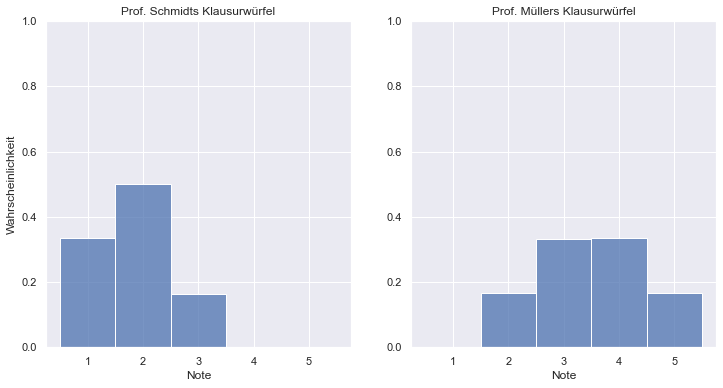

In [8]:
f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 2)

# Schmidt simulation
ax = f.add_subplot(gs[0, 0])
hist = sns.histplot(x=schmidt_simulation, stat='probability', ax=ax, discrete=True)
hist.set(ylabel="Wahrscheinlichkeit", xlabel="Note", title="Prof. Schmidts Klausurwürfel",
         xlim=(0.25, max(schmidt_dice.keys())+0.75), ylim=(0,1))

# Mueller simulation
ax = f.add_subplot(gs[0, 1])
hist = sns.histplot(x=mueller_simulation, stat='probability', ax=ax, discrete=True)
hist.set(ylabel="", xlabel="Note", title="Prof. Müllers Klausurwürfel",
         xlim=(0.25, max(mueller_dice.keys())+0.75), ylim=(0,1))

plt.show()

## 2. Eigener Klausurwürfel

In [9]:
def throw_own_dice(n=1):
    marks = [
        1.0, 1.3, 1.5, 1.7,
        2.0, 2.3, 2.5, 2.7,
        3.0, 3.3, 3.5, 3.7,
        4.0, 4.3, 4.5, 4.7,
        5.0,
    ]

    dice_throws = []
    for i in range(n):
        while True:
            try:
                random_index = np.random.poisson(4)
                dice_throws.append(marks[random_index])
                break
            except IndexError:
                pass

    return dice_throws

In [10]:
own_simulation = np.sort(throw_own_dice(number_of_throws))

In [11]:
own_df = pd.DataFrame(own_simulation)
own_df.describe()

,0
count,100000.000000
mean,1.998541
std,0.501298
min,1.000000
25%,1.700000
50%,2.000000
75%,2.300000
max,4.500000


In [12]:
print_dice_probability(own_df, number_of_throws)

Note - Wahrscheinlichkeit
1.0 - 0.01858
1.3 - 0.07447
1.5 - 0.14576
1.7 - 0.19492
2.0 - 0.19455
2.3 - 0.15658
2.5 - 0.1053
2.7 - 0.05886
3.0 - 0.02989
3.3 - 0.013
3.5 - 0.00531
3.7 - 0.00198
4.0 - 0.00063
4.3 - 0.00013
4.5 - 4e-05

Summe der Wahrscheinlichkeiten: 1.0


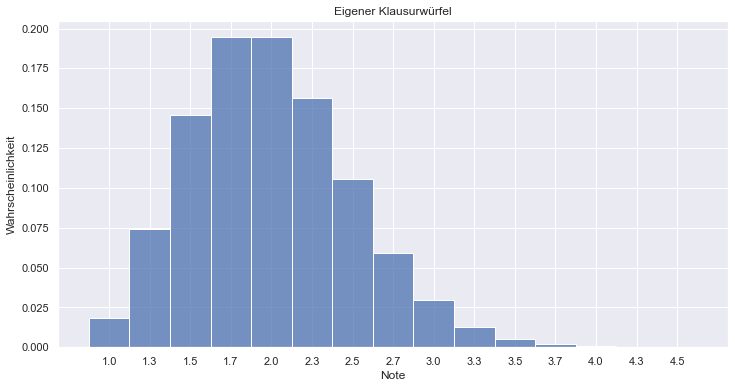

In [13]:
f = plt.figure(figsize=(12, 6))

own_simulation = [str(mark) for mark in own_simulation]

hist = sns.histplot(x=own_simulation, stat='probability')
hist.set(ylabel="Wahrscheinlichkeit", xlabel="Note", title="Eigener Klausurwürfel")

plt.show()